## Binary Detection of Images
We shall use the following principle to design our statistical model in order to perform the binary detection of images: "A sharper good quality image will have higher number of high frequency components compared to a blurred image."

As the synthetic (computer generated) images has sharper edges when compared to the natural (photographic/scenic) images, hence, the synthetic image shall contain greater number of high frequency components when compared to the natural images.

In the below section, we have defined a function to determine the sharpness of edges present in a given image (natural or synthetic). Next, we took 20 images from each of the sets and calculated the sharpness of edges in those images.

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import glob
%matplotlib inline

# Defined a function to calculate the sharpness of edges present in the image
def Calculate_Sharpness(filename):
    image = Image.open(filename)
    gray_image = ImageOps.grayscale(image) #Converting the given image to gray scale image
    F = fftpack.fft2(gray_image) #Computing the Fourier Transform of the Gray Scale Image
    Fc = fftpack.fftshift(F) #Shifting the origin of the computed Fourier Transform to the centre
    AF = np.abs(Fc) #Obtaining the absolute value of the centered fourier transform
    M = AF.max() #Finding the maximum value of the frequency component in the fourier transform
    Threshold = M/(1000*1000) #Setting the local threshold
    TH = 0
    count = 0
    image_data = np.array(gray_image.getdata()) 
    #Calculating the total number of high frequency components present in the image
    for i in range(len(image_data)): 
        if image_data[i]> Threshold:
            count = count+1 #Calculating the total number of pixels in F whose value > Threshold
    TH = count
    (m,n) = image.size #Obtaining the dimensions of the image
    FM = TH/(m*n) #Calculating the sharpness of the edges present in the image
    return FM #Returns the value of the sharpness of edges present in the image

FM_Natural = []
FM_Synthetic = []

#Calculating the sharpness of edges of all the Natural Images
for filename in glob.glob('D:/TAMU/Second Semester/Estimation and Detection Theory/Project/Training/Natural/*'):
    FMn = 0
    FMn = Calculate_Sharpness(filename)
    FM_Natural = np.append(FM_Natural, FMn)

#Calculating the sharpness of edges of all the Synthetic Images
for filename in glob.glob('D:/TAMU/Second Semester/Estimation and Detection Theory/Project/Training/Synthetic/*'):
    FMs = 0
    FMs = Calculate_Sharpness(filename)
    FM_Synthetic = np.append(FM_Synthetic, FMs)

Now, we shall plot the Histogram of the data found from those images so as to get the distributions of each set as a function of edge sharpness.

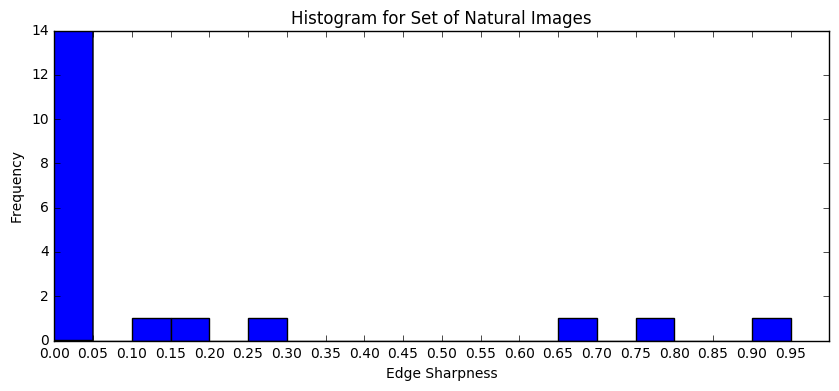

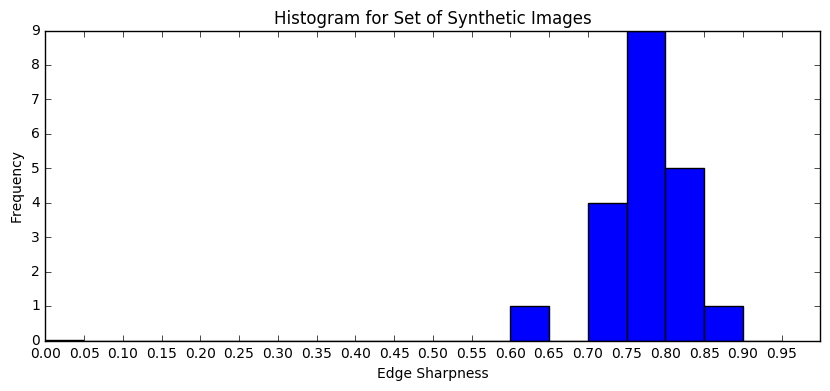

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Plotting the histogram for the data found from the set of Natural Images
fig1 = plt.figure(figsize=(10,4))
ax1 = fig1.add_subplot(1, 1, 1)
n, bins, patches = ax1.hist(FM_Natural, bins=np.arange(0,1,0.05))
ax1.set_xticks(np.arange(0,1,0.05))
ax1.set_xlabel('Edge Sharpness')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram for Set of Natural Images')

#Plotting the histogram for the data found from the set of Synthetic Images
fig2 = plt.figure(figsize=(10, 4))
ax2 = fig2.add_subplot(1, 1, 1)
n, bins, patches = ax2.hist(FM_Synthetic, bins=np.arange(0,1,0.05))
ax2.set_xticks(np.arange(0,1,0.05))
ax2.set_xlabel('Edge Sharpness')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram for Set of Synthetic Images')

From the received distributions, we get the threshold to be '0.71'.

Based on this threshold, we can detect whether any given image is a natural image or a synthetic image.

Here, we have tested one of the natural images from the test set. The result follows.

In [9]:
import glob

#Performing Binary Detection on the given image based on the designed Statistical Model
Pathname = input('Enter the path of the image file: ')
Filename = glob.glob(Pathname)
Edge_Sharpness = Calculate_Sharpness('D:/TAMU/Second Semester/Estimation and Detection Theory/Project/Testing/Natural/thumb_IMG_2606_1024.jpg')
if Edge_Sharpness > 0.71:
    print('This is a Synthetic Image')
elif Edge_Sharpness <= 0.71:
    print('This is a Natural Image')

This is a Natural Image


If we assume our true hypothesis (H1) to be the detection of computer generated images, the probabilities of false alarm and miss detection are given by the following code, which runs the algorithm on the test set consisting of 35 images of each. The accuracy of the detector is found to be 91.428%.

In [8]:
import numpy as np

FM_Natural = []
FM_Synthetic = []

#Calculating the Probability of False Alarm
for filename in glob.glob('D:/TAMU/Second Semester/Estimation and Detection Theory/Project/Testing/Natural/*'):
    FMn = 0
    FMn = Calculate_Sharpness(filename)
    FM_Natural = np.append(FM_Natural, FMn)
for i in range(len(FM_Natural)):
    if FM_Natural[i] > 0.71:
        natural = natural+1
Probability_FalseAlarm = natural/70
Text_PFA = 'The Probability of False Alarm is:'
print(Text_PFA, Probability_FalseAlarm)

#Calculating the Probability of Miss Detection
for filename in glob.glob('D:/TAMU/Second Semester/Estimation and Detection Theory/Project/Testing/Synthetic/*'):
    FMs = 0
    FMs = Calculate_Sharpness(filename)
    FM_Synthetic = np.append(FM_Synthetic, FMs)
for i in range(len(FM_Synthetic)):
    if FM_Synthetic[i] <= 0.71:
        synthetic = synthetic+1
Probability_MissDetection = synthetic/70
Text_PMD = 'The Probability of Miss Detection is:'
print(Text_PMD, Probability_Miss Detection)

#Computing the Accuarcy of the Detector
Accuracy = (1 - Probability_FalseAlarm - Probability_MissDetection)*100
Text_Accuracy = 'The Accuracy of the Detector is:'
text = '%'
print(Text_Accuracy, Accuracy, text)

The Probability of False Alarm is: 0.057
The Probability of Miss Detection is: 0.028
The Accuracy of the Detector is: 91.428 %
